In [1]:
import pandas as pd
import numpy as np

In [2]:
data1=pd.read_csv("/home/adesh/Downloads/honeywell_hackthon/position-data-2024-02-02.csv",skiprows=2)

In [65]:
data2=pd.read_csv("/home/adesh/Downloads/honeywell_hackthon/position-data-2024-02-01.csv",skiprows=2)

In [66]:
data3=pd.read_csv("/home/adesh/Downloads/honeywell_hackthon/position-data-2024-02-03.csv",skiprows=2)

In [3]:
data1=data1.sort_values(by=['id','t'])

In [4]:
data1.head()

,id,t,la,lo,alt,hd,gs
347,002e9c,2024-02-02 00:00:04,39.325424,-77.739853,16800.0,335.35860,371.0
862,002e9c,2024-02-02 00:00:10,39.336044,-77.746063,17300.0,335.66513,371.0
1346,002e9c,2024-02-02 00:00:15,39.343872,-77.750664,17650.0,335.55630,374.0
1601,002e9c,2024-02-02 00:00:18,39.348907,-77.753647,17825.0,335.38608,374.0
2051,002e9c,2024-02-02 00:00:23,39.355820,-77.757706,18100.0,335.58243,375.0


In [5]:
len(data1.id.unique())

1632

In [6]:
data1.groupby("id").count()

,t,la,lo,alt,hd,gs
id,,,,,,
002e9c,5102,5102,5102,4618,5097,4306
0048c0,2365,2365,2365,2239,2363,2263
004ec9,563,563,563,504,563,536
007c6a,5654,5654,5654,5094,5653,5153
00b3d4,9300,9300,9300,7877,9298,7635
...,...,...,...,...,...,...
feccfb,5509,5509,5509,5058,5506,4902
ff1b07,3429,3429,3429,3202,3423,3004
ff212c,3707,3707,3707,3599,3705,3488


In [7]:
import matplotlib.pyplot as plt

In [8]:
data1[data1.id=='002e9c']

,id,t,la,lo,alt,hd,gs
347,002e9c,2024-02-02 00:00:04,39.325424,-77.739853,16800.0,335.35860,371.0
862,002e9c,2024-02-02 00:00:10,39.336044,-77.746063,17300.0,335.66513,371.0
1346,002e9c,2024-02-02 00:00:15,39.343872,-77.750664,17650.0,335.55630,374.0
1601,002e9c,2024-02-02 00:00:18,39.348907,-77.753647,17825.0,335.38608,374.0
2051,002e9c,2024-02-02 00:00:23,39.355820,-77.757706,18100.0,335.58243,375.0
...,...,...,...,...,...,...,...
6209774,002e9c,2024-02-02 23:33:24,47.538094,-122.305817,NaN,353.39400,9.0
6209808,002e9c,2024-02-02 23:33:24,47.538094,-122.305817,NaN,353.39400,9.0
6209809,002e9c,2024-02-02 23:33:24,47.538094,-122.305817,NaN,353.39400,9.0
6276131,002e9c,2024-02-02 23:45:38.846,47.538094,-122.305817,NaN,353.39400,9.0


In [63]:
data1.id.unique()

array(['002e9c', '0048c0', '004ec9', ..., 'ff212c', 'ff29ab', 'ffd5fe'],
      dtype=object)

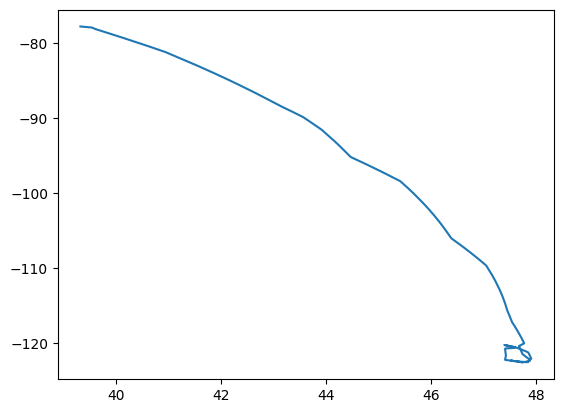

In [9]:
plt.plot(data1[data1.id=='002e9c'].la,data1[data1.id=='002e9c'].lo)

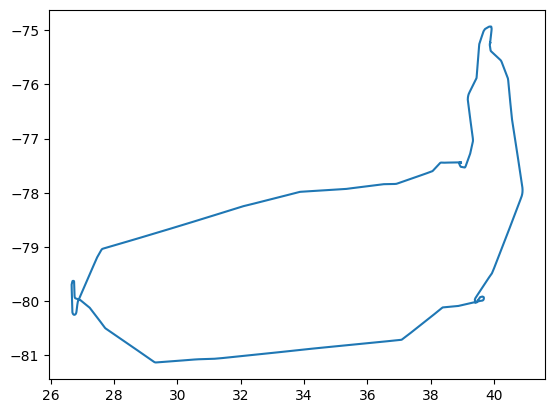

In [10]:
plt.plot(data1[data1.id=='feccfb'].la,data1[data1.id=='feccfb'].lo)

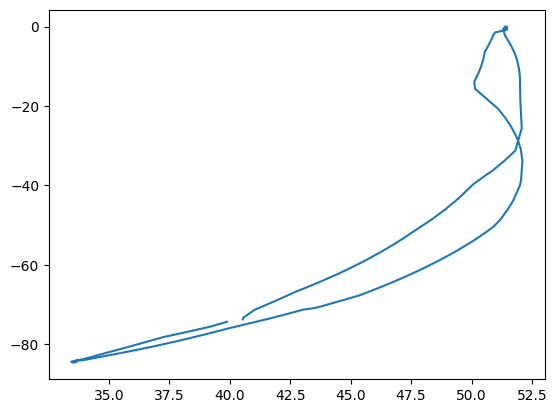

In [11]:
plt.plot(data1[data1.id=='00b3d4'].la,data1[data1.id=='00b3d4'].lo)

In [12]:
from sklearn.ensemble import IsolationForest

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
outliers_fraction = float(.01)
scaler = StandardScaler()

In [30]:
data1

,id,t,la,lo,alt,hd,gs
347,002e9c,2024-02-02 00:00:04,39.325424,-77.739853,16800.0,335.35860,371.0
862,002e9c,2024-02-02 00:00:10,39.336044,-77.746063,17300.0,335.66513,371.0
1346,002e9c,2024-02-02 00:00:15,39.343872,-77.750664,17650.0,335.55630,374.0
1601,002e9c,2024-02-02 00:00:18,39.348907,-77.753647,17825.0,335.38608,374.0
2051,002e9c,2024-02-02 00:00:23,39.355820,-77.757706,18100.0,335.58243,375.0
...,...,...,...,...,...,...,...
1125701,ffd5fe,2024-02-02 04:18:52,34.198879,-118.358521,NaN,271.09420,NaN
1126185,ffd5fe,2024-02-02 04:19:04,34.198883,-118.359161,NaN,270.43260,NaN
1126322,ffd5fe,2024-02-02 04:19:07,34.198891,-118.359344,NaN,270.43260,NaN
1129476,ffd5fe,2024-02-02 04:20:22,34.199558,-118.359749,NaN,333.33420,NaN


In [57]:
np_scaled = scaler.fit_transform(data1[data1.id=='00b3d4'][['la','lo','alt','hd']])
data = pd.DataFrame(np_scaled).dropna()

In [58]:
# train isolation forest
model =  IsolationForest(contamination=outliers_fraction)
model.fit(data)

IsolationForest(contamination=0.01)

In [59]:
data['anomaly'] = model.predict(data)

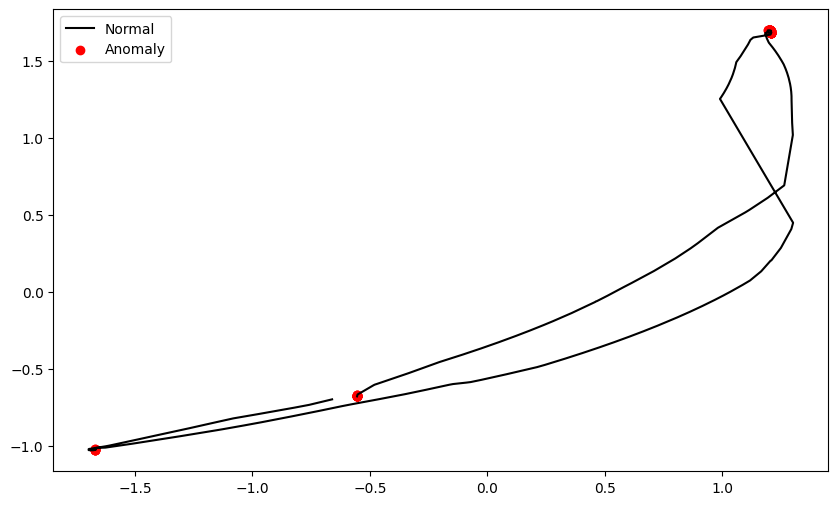

In [60]:
# visualization
fig, ax = plt.subplots(figsize=(10,6))
a =  data[data.anomaly==-1]
ax.plot(data[0],data[1], color='black', label = 'Normal')
ax.scatter(a[0],a[1], color='red', label = 'Anomaly')
plt.legend()
plt.show();

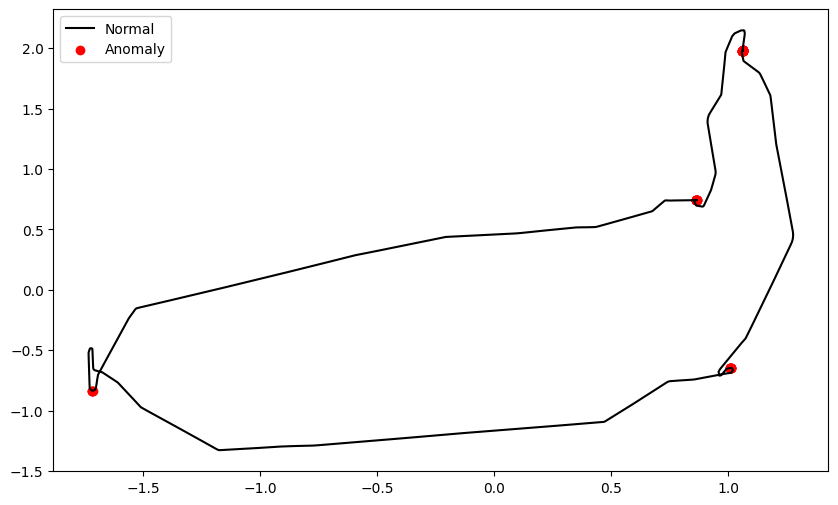

In [46]:
np_scaled = scaler.fit_transform(data1[data1.id=='feccfb'][['la','lo','alt','hd','gs']])
data = pd.DataFrame(np_scaled).dropna()
model =  IsolationForest(contamination=outliers_fraction)
model.fit(data)
data['anomaly'] = model.predict(data)
fig, ax = plt.subplots(figsize=(10,6))
a =  data[data.anomaly==-1]
ax.plot(data[0],data[1], color='black', label = 'Normal')
ax.scatter(a[0],a[1], color='red', label = 'Anomaly')
plt.legend()
plt.show();

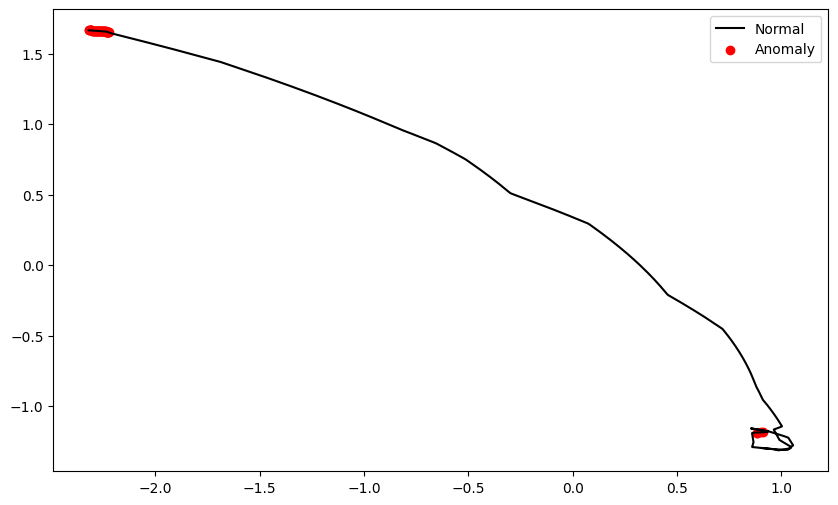

In [52]:
np_scaled = scaler.fit_transform(data1[data1.id=='002e9c'][['la','lo','alt','hd']])
data = pd.DataFrame(np_scaled).dropna()
model =  IsolationForest(contamination=outliers_fraction)
model.fit(data)
data['anomaly'] = model.predict(data)
fig, ax = plt.subplots(figsize=(10,6))
a =  data[data.anomaly==-1]
ax.plot(data[0],data[1], color='black', label = 'Normal')
ax.scatter(a[0],a[1], color='red', label = 'Anomaly')
plt.legend()
plt.show();

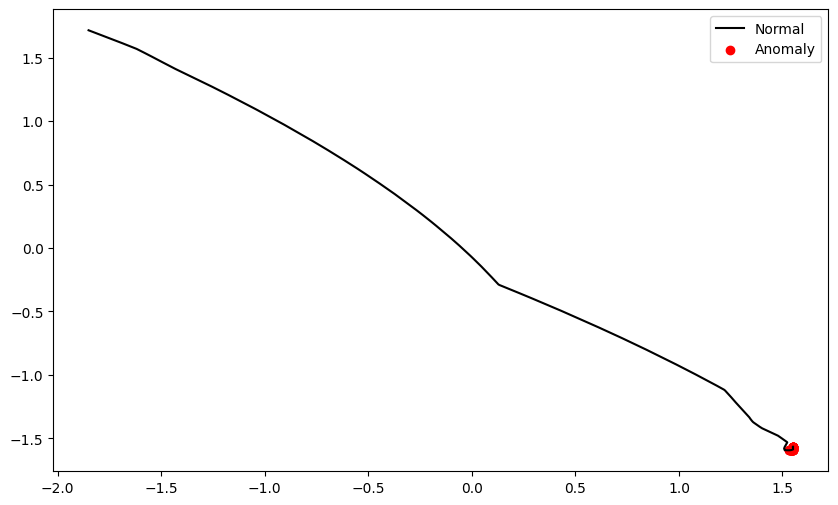

In [61]:
np_scaled = scaler.fit_transform(data1[data1.id=='ffd5fe'][['la','lo','alt','hd']])
data = pd.DataFrame(np_scaled).dropna()
model =  IsolationForest(contamination=outliers_fraction)
model.fit(data)
data['anomaly'] = model.predict(data)
fig, ax = plt.subplots(figsize=(10,6))
a =  data[data.anomaly==-1]
ax.plot(data[0],data[1], color='black', label = 'Normal')
ax.scatter(a[0],a[1], color='red', label = 'Anomaly')
plt.legend()
plt.show();

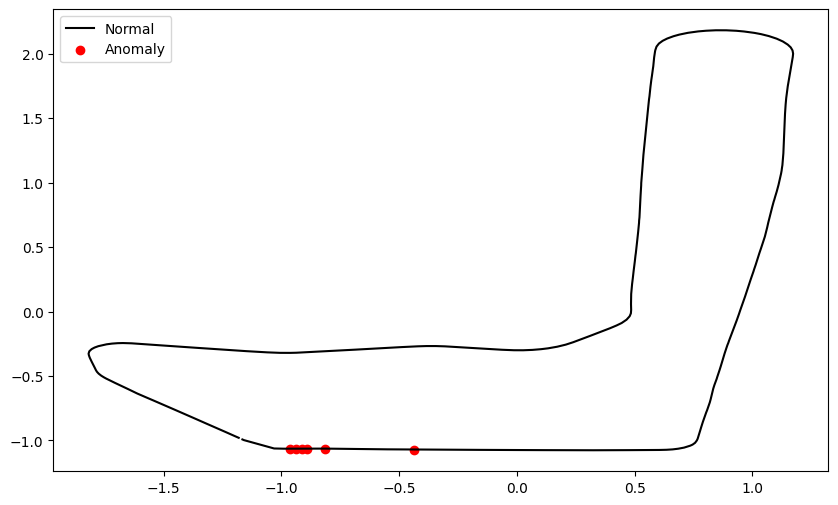

In [64]:

np_scaled = scaler.fit_transform(data1[data1.id=='004ec9'][['la','lo','alt','hd']])
data = pd.DataFrame(np_scaled).dropna()
model =  IsolationForest(contamination=outliers_fraction)
model.fit(data)
data['anomaly'] = model.predict(data)
fig, ax = plt.subplots(figsize=(10,6))
a =  data[data.anomaly==-1]
ax.plot(data[0],data[1], color='black', label = 'Normal')
ax.scatter(a[0],a[1], color='red', label = 'Anomaly')
plt.legend()
plt.show();

In [67]:
data2=data2.sort_values(by=['id','t'])

In [69]:
data2.groupby("id").count()

,t,la,lo,alt,hd,gs
id,,,,,,
000537,132,132,132,0,132,23
002e9c,5725,5725,5725,5451,5725,5458
0048c0,1498,1498,1498,1485,1498,1495
0074e6,1,1,1,0,0,0
007c6a,9158,9158,9158,8352,9150,8095
...,...,...,...,...,...,...
ff0e69,244,244,244,242,244,241
ff212c,3839,3839,3839,3608,3821,3289
ff29ab,3851,3851,3851,3407,3848,2621


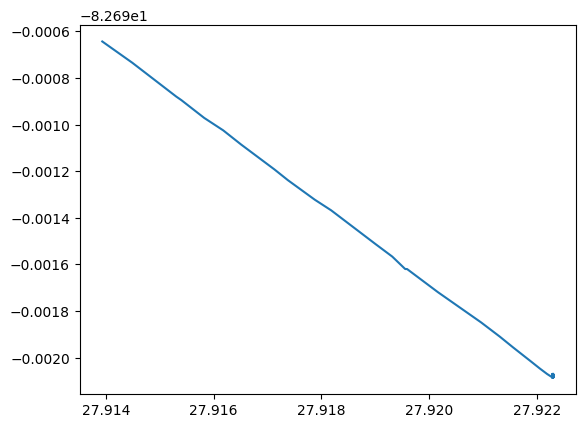

In [71]:
plt.plot(data2[data2.id=='000537'].la,data2[data2.id=='000537'].lo)

In [79]:
np_scaled = scaler.fit_transform(data2[data2.id=='000537'][['la','lo','gs']])
data = pd.DataFrame(np_scaled).dropna()

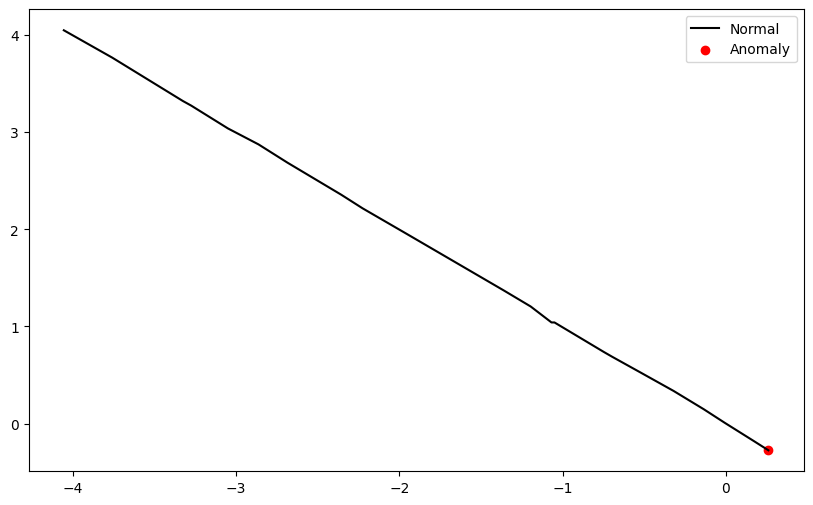

In [80]:
model =  IsolationForest(contamination=outliers_fraction)
model.fit(data)
data['anomaly'] = model.predict(data)
fig, ax = plt.subplots(figsize=(10,6))
a =  data[data.anomaly==-1]
ax.plot(data[0],data[1], color='black', label = 'Normal')
ax.scatter(a[0],a[1], color='red', label = 'Anomaly')
plt.legend()
plt.show();

#K-nearest Neighbour

In [88]:
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors = 5)
# fit model
nbrs.fit(data)

/home/adesh/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


NearestNeighbors()

In [90]:
distances = pd.DataFrame(distances)
distances_mean = distances.mean(axis =1)
distances_mean

0     1.997121
1     0.756576
2     0.529767
3     0.450388
4     0.370610
5     0.348604
6     0.441632
7     0.437141
8     0.290651
9     0.291997
10    0.352823
11    0.617193
12    0.673323
13    0.552527
14    0.558935
15    0.595050
16    0.494029
17    0.598890
18    0.439794
19    0.450548
20    0.430359
21    0.430359
22    0.647580
dtype: float64

In [92]:
th =distances_mean.mean()
outlier_index = np.where(distances_mean > th)
outlier_index

(array([ 0,  1,  2, 11, 12, 13, 14, 15, 17, 22]),)

In [93]:
outlier_values = data.iloc[outlier_index]
outlier_values

,0,1,2,anomaly
108,0.259479,-0.274447,-2.502743,-1
109,0.171346,-0.180473,-1.643592,1
110,-0.006945,0.007475,-1.357209,1
119,-1.360341,1.370098,0.361092,1
121,-1.960050,1.957435,0.933859,1
122,-2.225461,2.215863,0.933859,1
123,-2.357154,2.356824,1.506626,1
124,-2.685373,2.685733,1.506626,1
126,-3.050061,3.038136,0.361092,1
131,-4.054977,4.048356,0.361092,1


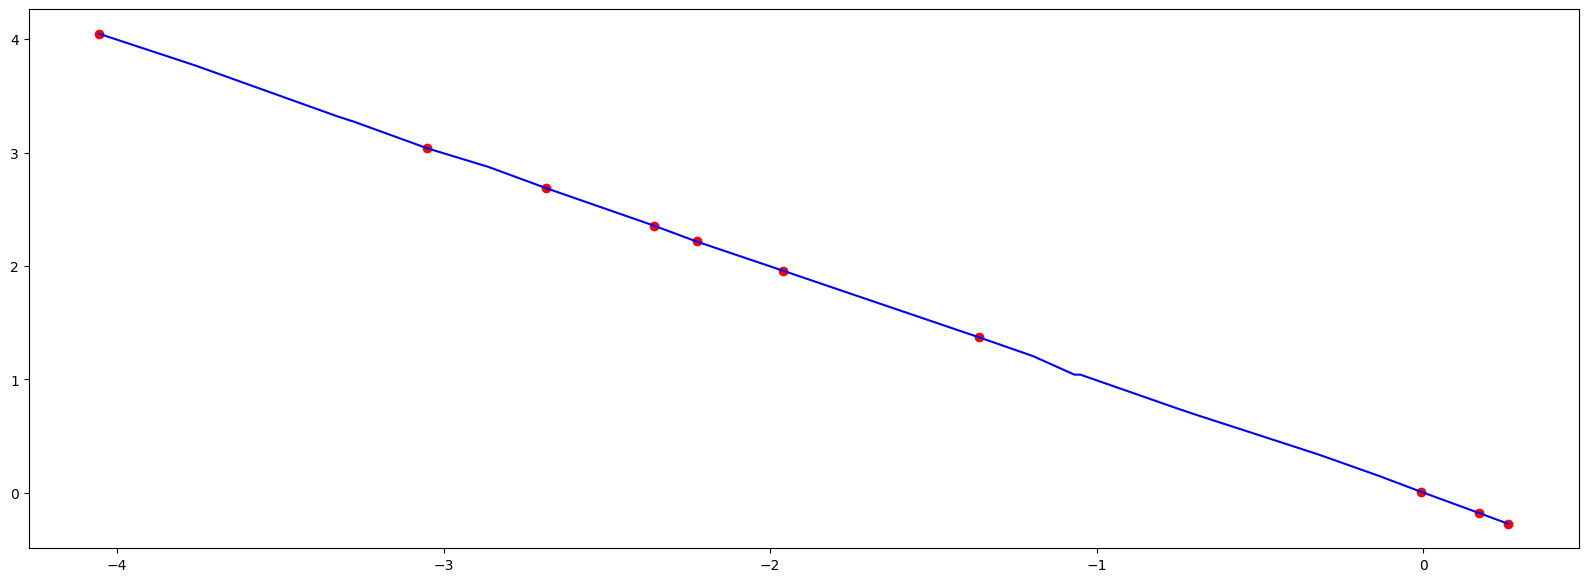

In [95]:
plt.figure(figsize=(20, 7))
plt.plot(data[0], data[1], color = "b")
# plot outlier values
plt.scatter(outlier_values[0], outlier_values[1], color = "r")

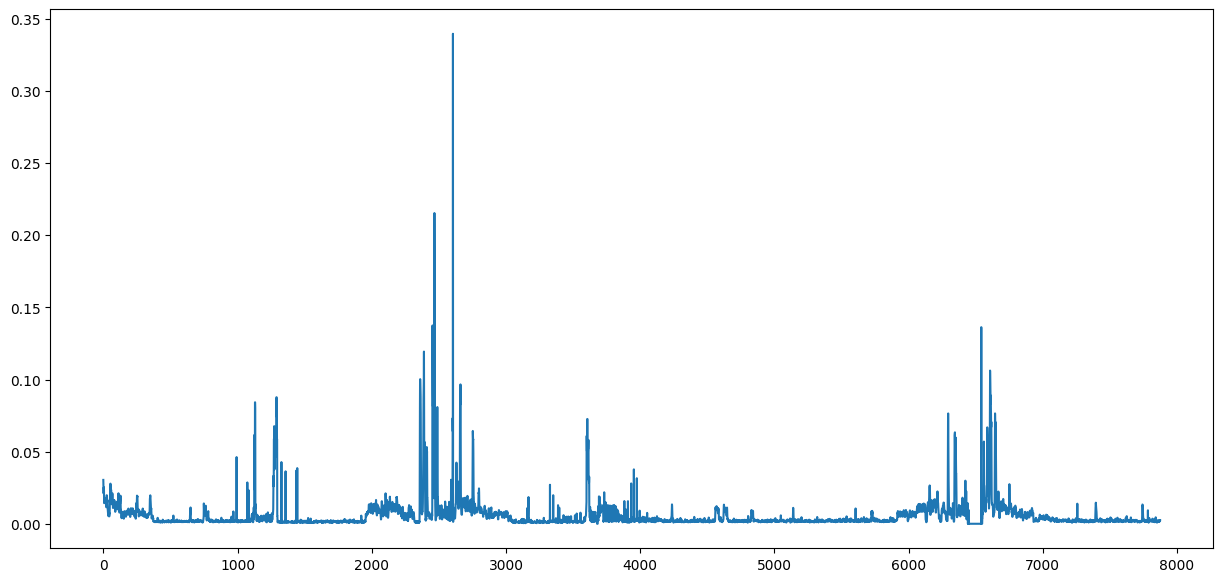

In [101]:
np_scaled = scaler.fit_transform(data1[data1.id=='00b3d4'][['la','lo','alt','hd']])
data = pd.DataFrame(np_scaled).dropna()
nbrs = NearestNeighbors(n_neighbors = 5)
# fit model
nbrs.fit(data)
distances, indexes = nbrs.kneighbors(data)
# plot
plt.figure(figsize=(15, 7))
plt.plot(distances.mean(axis =1))
distances = pd.DataFrame(distances)
distances_mean = distances.mean(axis =1)

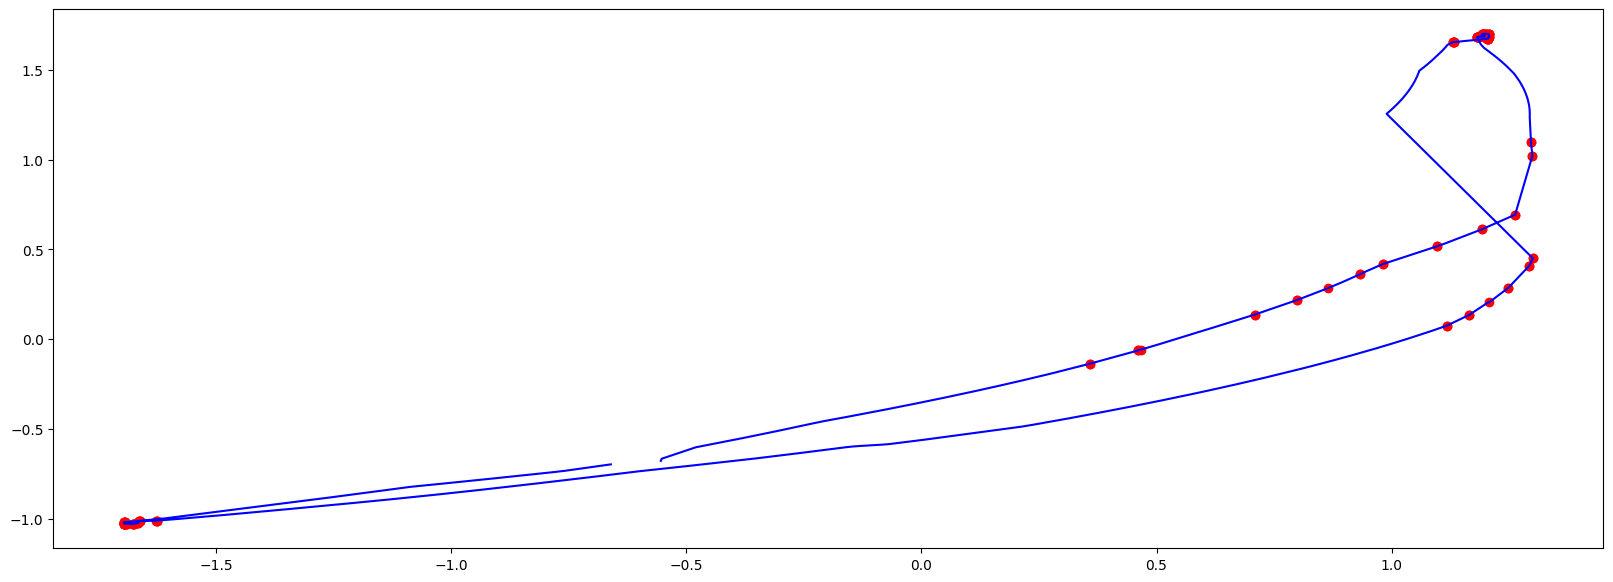

In [107]:
th =0.05
outlier_index = np.where(distances_mean > th)
outlier_values = data.iloc[outlier_index]
plt.figure(figsize=(20, 7))
plt.plot(data[0], data[1], color = "b")
# plot outlier values
plt.scatter(outlier_values[0], outlier_values[1], color = "r")

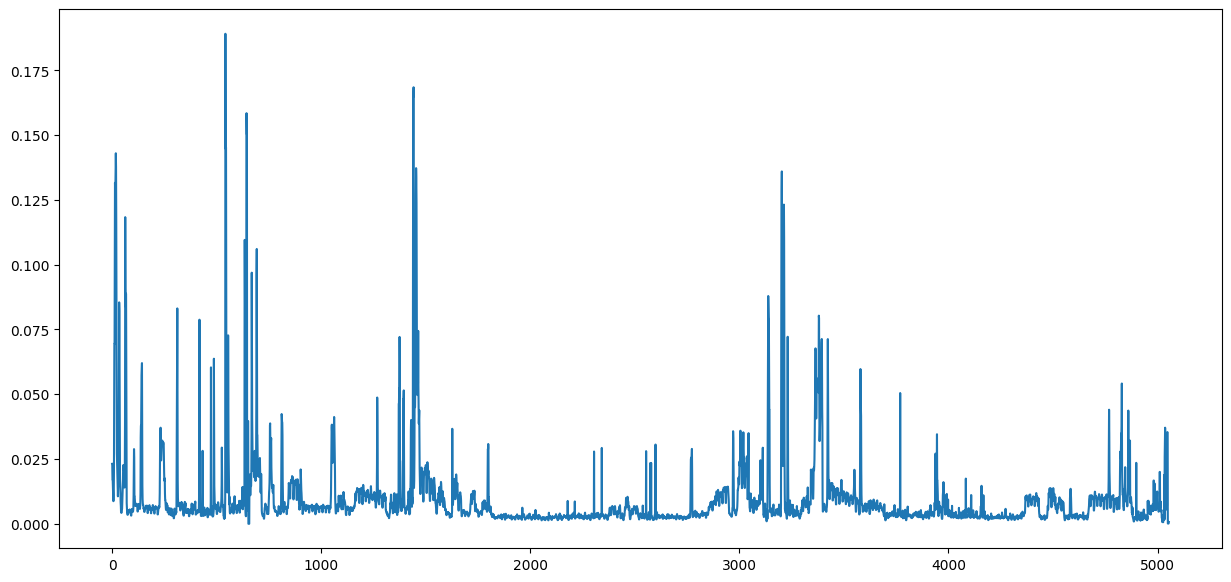

In [109]:
np_scaled = scaler.fit_transform(data1[data1.id=='feccfb'][['la','lo','alt','hd']])
data = pd.DataFrame(np_scaled).dropna()
nbrs = NearestNeighbors(n_neighbors = 5)
# fit model
nbrs.fit(data)
distances, indexes = nbrs.kneighbors(data)
# plot
plt.figure(figsize=(15, 7))
plt.plot(distances.mean(axis =1))
distances = pd.DataFrame(distances)
distances_mean = distances.mean(axis =1)

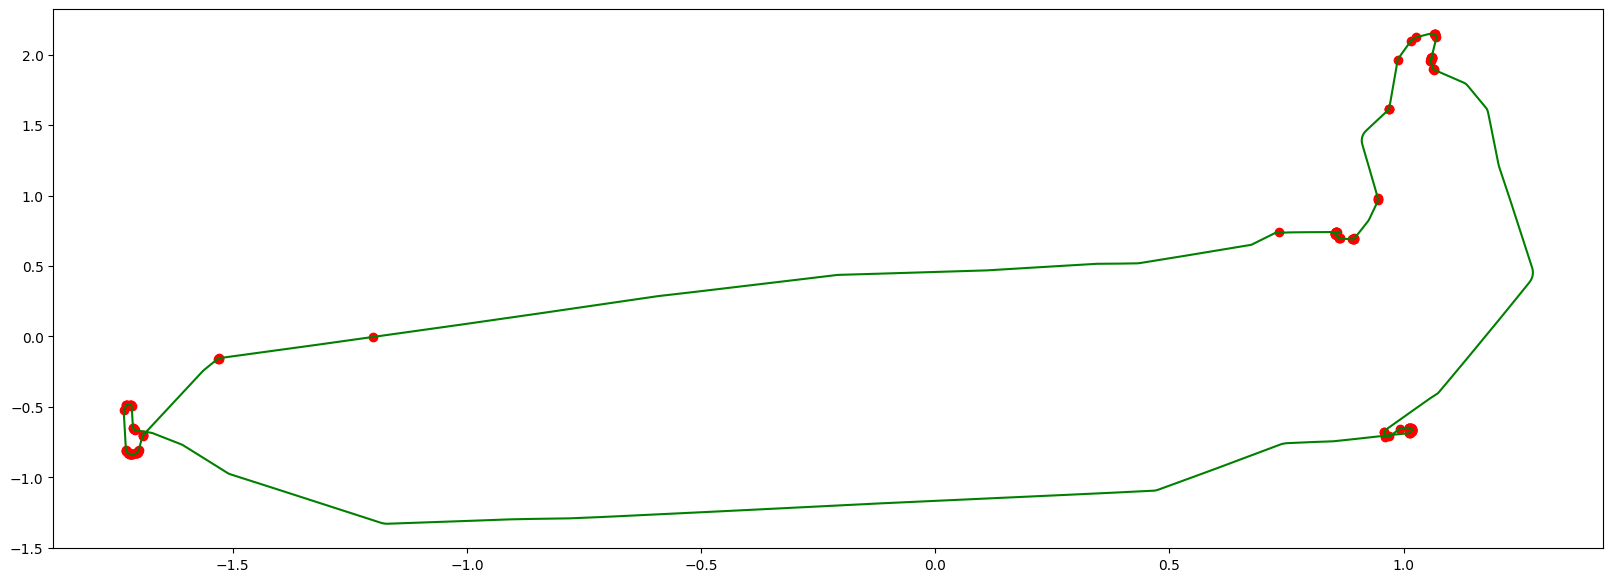

In [112]:
th =0.050
outlier_index = np.where(distances_mean > th)
outlier_values = data.iloc[outlier_index]
plt.figure(figsize=(20, 7))
plt.plot(data[0], data[1], color = "g")
# plot outlier values
plt.scatter(outlier_values[0], outlier_values[1], color = "r")

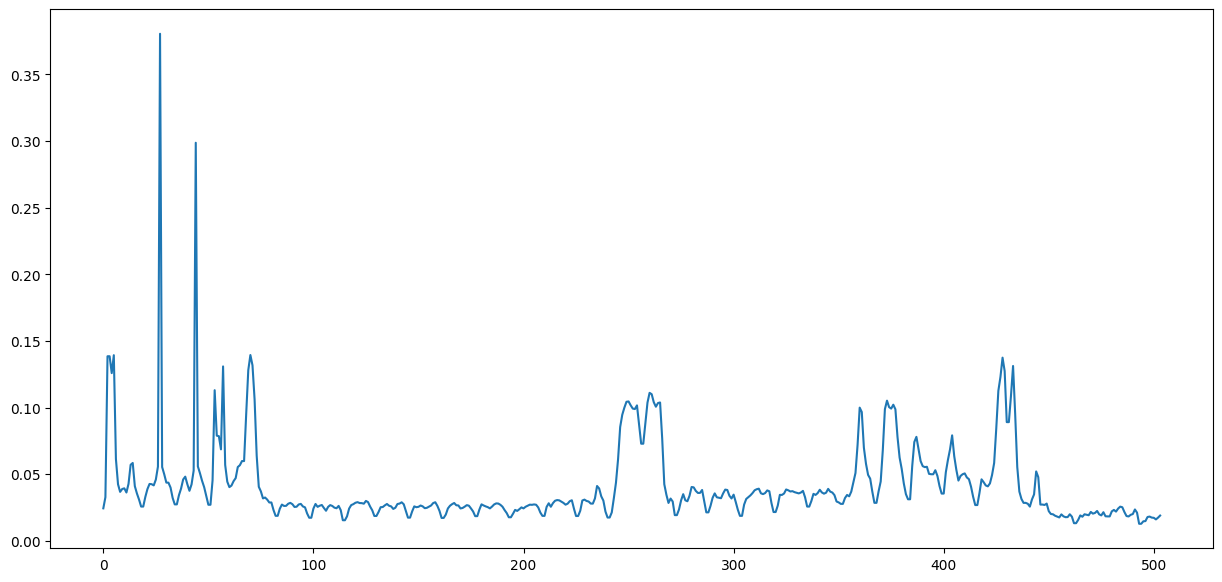

In [113]:
np_scaled = scaler.fit_transform(data1[data1.id=='004ec9'][['la','lo','alt','hd']])
data = pd.DataFrame(np_scaled).dropna()
nbrs = NearestNeighbors(n_neighbors = 5)
# fit model
nbrs.fit(data)
distances, indexes = nbrs.kneighbors(data)
# plot
plt.figure(figsize=(15, 7))
plt.plot(distances.mean(axis =1))
distances = pd.DataFrame(distances)
distances_mean = distances.mean(axis =1)

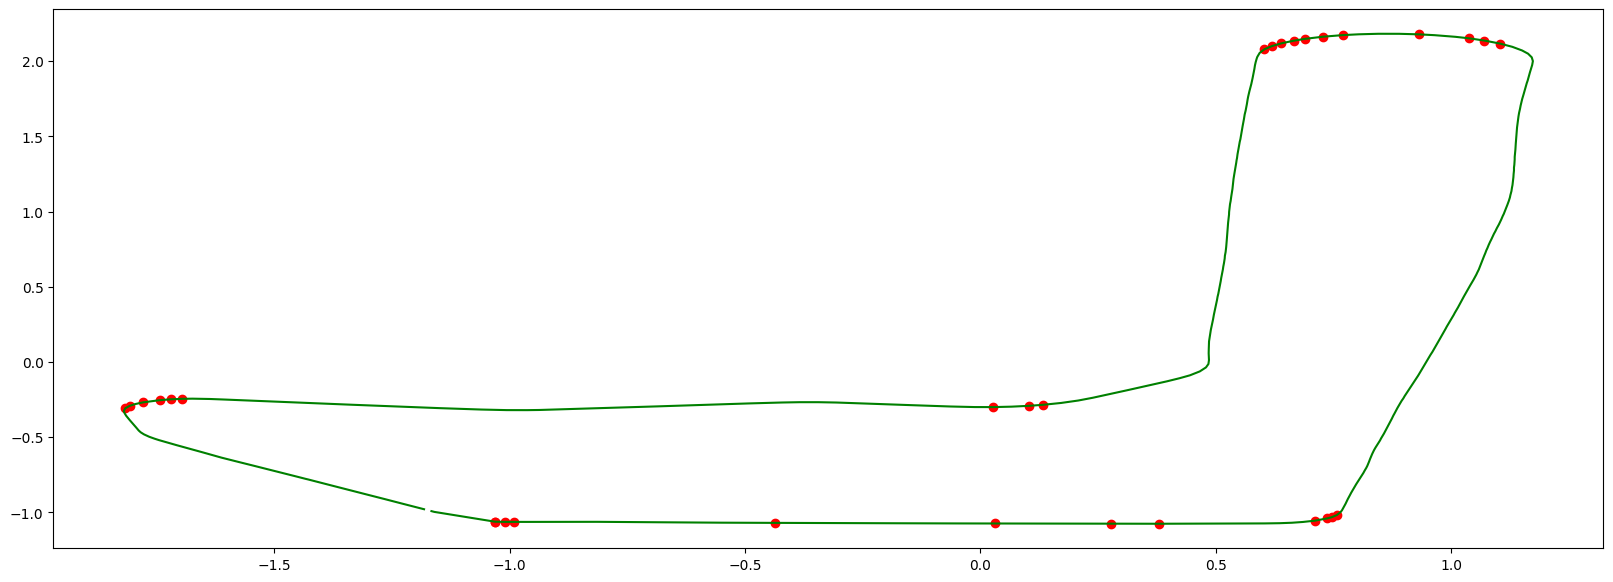

In [125]:
th =0.10
outlier_index = np.where(distances_mean > th)
outlier_values = data.iloc[outlier_index]
plt.figure(figsize=(20, 7))
plt.plot(data[0], data[1], color = "g")
# plot outlier values
plt.scatter(outlier_values[0], outlier_values[1], color = "r")

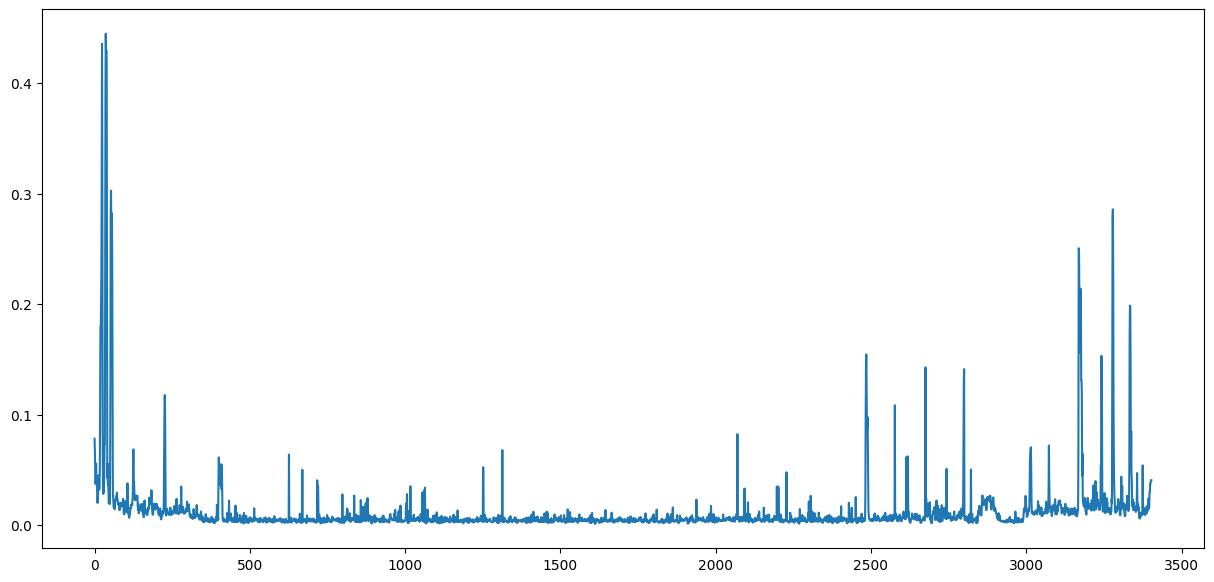

In [126]:
np_scaled = scaler.fit_transform(data2[data2.id=='ff29ab'][['la','lo','alt','hd']])
data = pd.DataFrame(np_scaled).dropna()
nbrs = NearestNeighbors(n_neighbors = 5)
# fit model
nbrs.fit(data)
distances, indexes = nbrs.kneighbors(data)
# plot
plt.figure(figsize=(15, 7))
plt.plot(distances.mean(axis =1))
distances = pd.DataFrame(distances)
distances_mean = distances.mean(axis =1)

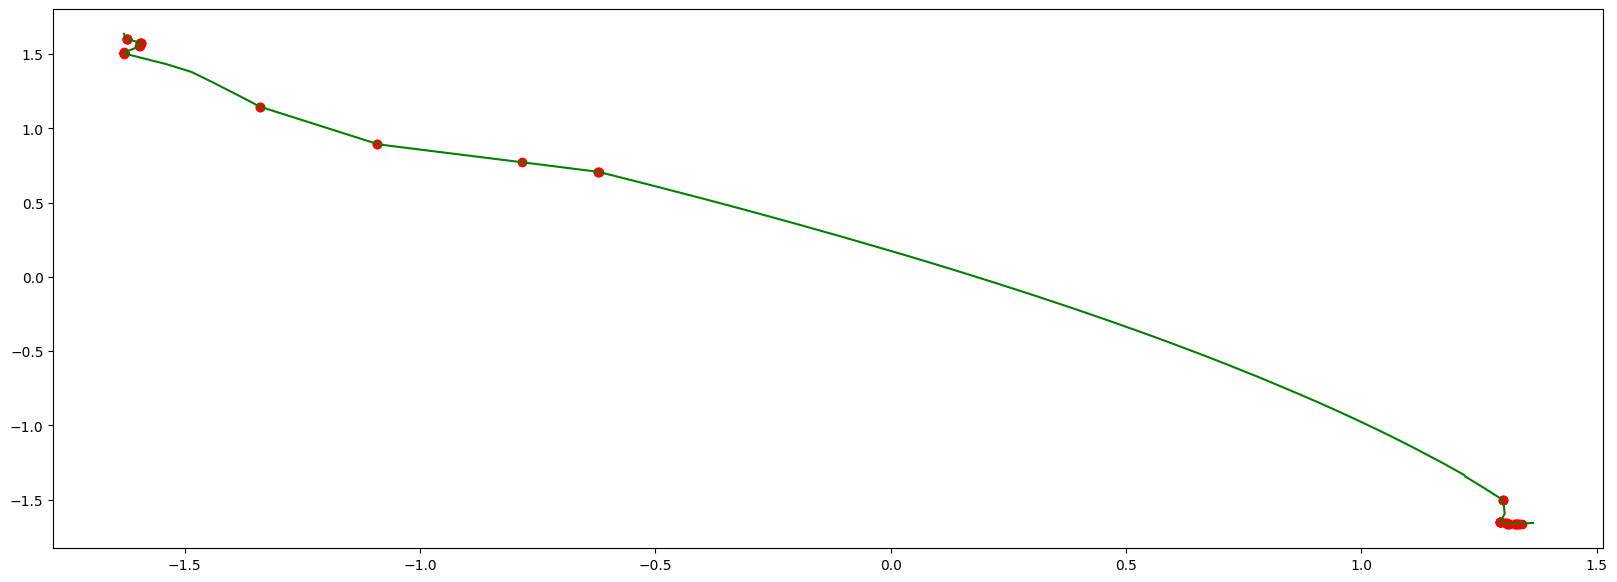

In [127]:
th =0.1
outlier_index = np.where(distances_mean > th)
outlier_values = data.iloc[outlier_index]
plt.figure(figsize=(20, 7))
plt.plot(data[0], data[1], color = "g")
# plot outlier values
plt.scatter(outlier_values[0], outlier_values[1], color = "r")

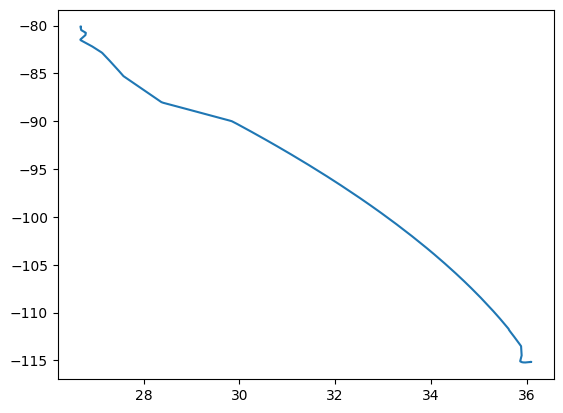

In [128]:
plt.plot(data2[data2.id=='ff29ab'].la,data2[data2.id=='ff29ab'].lo)